In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
d = 5
# x_stab = 9
t_x = 0
r_x = -1
# c_func = lambda t,r,a: a - (d**2-1)/4*(1+2*t) + (r-1)/2*(d+1)/2
c = 1 #c_func(t_x,r_x,x_stab)
# print(c)
q_func = lambda t,r,c,i: ((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t)
a_func = lambda t,r,c,i: (d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c 
# t = 0 for X or 1 for Z
# r rotation of alg -1 or +1 left/right for X chains, up/down for Z-chain
# 0 <= i <= (d-1)/2 - 1
# print(c, q_func(0,1,0),a_func(0,1,0))
for i in range((d-1)//2 ):
    print(q_func(t_x,r_x,c,i),a_func(t_x,r_x,c,i))


11.0 4.0
10.0 1.0


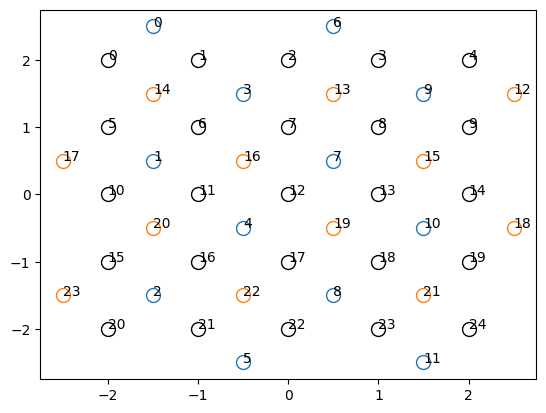

In [119]:
# for c in range():

q_list = {}
sz_list = {}
c_sz = (d**2-1)-1
for row in range(d):
    for col in range(d):
        x, y = col-(d-1)/2, row-(d-1)/2
        q_list[f"{d**2-d+col-d*row}"] = (x,y)
        plt.plot(x,y,"o",markersize=10,markerfacecolor="None",markeredgecolor="k")
        plt.text(x,y,f"{d**2-d+col-d*row}")

        # if (row + col) % 2 == 1 and row > 0:
        if row %2 ==1 and col % 2 == 0:
            x_sz, y_sz = x+0.5, y+ 0.5
            sz_list[f"{c_sz}"] = (x_sz, y_sz)
            plt.plot(x_sz,y_sz,"o",markersize=10,markerfacecolor="None",markeredgecolor="C1")
            plt.text(x_sz,y_sz,f"{c_sz}")
            c_sz -= 1
        if row %2 ==0 and col % 2 == 0 and row < d-1:
            x_sz, y_sz = x-0.5, y+ 0.5
            sz_list[f"{c_sz}"] = (x_sz, y_sz)
            plt.plot(x_sz,y_sz,"o",markersize=10,markerfacecolor="None",markeredgecolor="C1")
            plt.text(x_sz,y_sz,f"{c_sz}")
            c_sz -= 1


c_q = 0
sx_list = {}
c_sx = 0# (d**2-1)-1
for col in range(d):
    for row in range(d):
        x, y = col-(d-1)/2, (d-1)/2-row
        # plt.plot(x,y,"o",markersize=10,markerfacecolor="None",markeredgecolor="k")
        # plt.text(x,y,f"{c_q}")
        # c_q += 1
        # # if (row + col) % 2 == 1 and row > 0:
        if row %2 ==0 and col % 2 == 1:
            x_s, y_s = x+0.5, y- 0.5
            sx_list[f"{c_sx}"] = (x_s, y_s)
            plt.plot(x_s,y_s,"o",markersize=10,markerfacecolor="None",markeredgecolor="C0")
            plt.text(x_s,y_s,f"{c_sx}")
            c_sx += 1
        if row %2 ==0 and col % 2 == 0 and col < d-1:
            x_s, y_s = x+0.5, y+ 0.5
            sx_list[f"{c_sx}"] = (x_s, y_s)
            plt.plot(x_s,y_s,"o",markersize=10,markerfacecolor="None",markeredgecolor="C0")
            plt.text(x_s,y_s,f"{c_sx}")
            c_sx += 1



In [3]:
def idx_to_coord(d):
    q_list = {}
    sz_list = {}
    c_sz = (d**2-1)-1
    for row in range(d):
        for col in range(d):
            x, y = col-(d-1)/2, row-(d-1)/2
            q_list[f"{d**2-d+col-d*row}"] = (x,y)
            if row %2 ==1 and col % 2 == 0:
                x_sz, y_sz = x+0.5, y+ 0.5
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1
            if row %2 ==0 and col % 2 == 0 and row < d-1:
                x_sz, y_sz = x-0.5, y+ 0.5
                sz_list[f"{c_sz}"] = (x_sz, y_sz)
                c_sz -= 1

    c_q = 0
    sx_list = {}
    c_sx = 0# (d**2-1)-1
    for col in range(d):
        for row in range(d):
            x, y = col-(d-1)/2, (d-1)/2-row
            if row %2 ==0 and col % 2 == 1:
                x_s, y_s = x+0.5, y- 0.5
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1
            if row %2 ==0 and col % 2 == 0 and col < d-1:
                x_s, y_s = x+0.5, y+ 0.5
                sx_list[f"{c_sx}"] = (x_s, y_s)
                c_sx += 1
    return q_list, sx_list, sz_list

def plotter(idx_list, color, marker="o"):
    for idx in (idx_list):
        # print(idx, idx_list[f"{idx}"])
        x, y = idx_list[f"{idx}"]
        plt.plot(x,y,marker= marker,markersize=10,markerfacecolor="None",markeredgecolor=color)
        plt.text(x,y,f"{idx}")



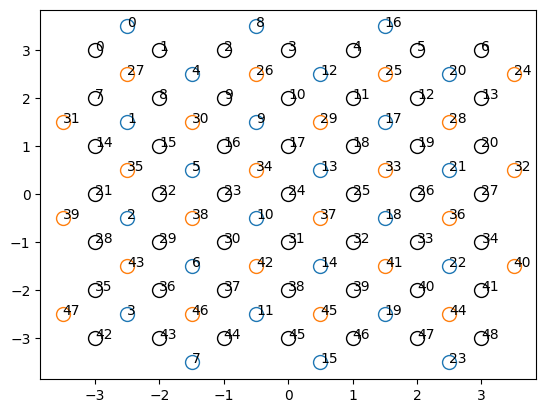

In [19]:
d = 7
q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,"k")
plotter(sx_list,"C0")
plotter(sz_list,"C1")
# plotter(sz_list)


In [20]:
# d = 5
c_list = np.arange((d+1)//2)
q_func = lambda t,r,c,i: int(((d-1)/2+r*(i+1)+1)*(t*d+(1-t)) -1 + 2*c*(d*(1-t)-t))
a_func = lambda t,r,c,i: int((d**2-1)/4*(1+2*t) + ((r-1)/2+r*i)*(d+1)/2 +c )

x_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 0
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            x_stab_to_c[a_func(t,r,c,i)] = c

z_stab_to_c = np.zeros((d**2-1)//2,dtype=int)
t = 1
for r in [-1,1]:
    for c in c_list:
        for i in range((d-1)//2 ):
            z_stab_to_c[a_func(t,r,c,i)-(d**2-1)//2] = c
            
def decoder(syndrome, x_or_z):
    recovery = np.zeros(d**2)
    trc_list = []
    if x_or_z == "x":
        t = 0
        for s in syndrome:
            c = x_stab_to_c[s]
            r = -1 if s< (d**2-1)//4 else 1
            trc_list.append((t,r,c))

        trc_list = list(set(trc_list))
        # print(trc_list)

        for t,r,c in trc_list:
            i = 0
            recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome)
            for i in range(1,(d-1)//2 ):
                recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome) + recovery[q_func(t,r,c,i-1)]

    else:
        t = 1
        for s in syndrome:
            c = z_stab_to_c[s-(d**2-1)//2]
            # r = -1 if s< (d**2-1)//4 else 1
            r = -1 if sz_list[f"{s}"][1]> 0 else 1
            trc_list.append((t,r,c))

        trc_list = list(set(trc_list))
        # print(trc_list)

        for t,r,c in trc_list:
            i = 0
            recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome)
            for i in range(1,(d-1)//2 ):
                recovery[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome) + recovery[q_func(t,r,c,i-1)]


    recovery %= 2 
    return np.argwhere(recovery>0)[:,0]


In [45]:
def decoder(d, syndrome):

    syndrome_x = syndrome[np.argwhere(syndrome< (d**2-1)//2)[:,0]]
    syndrome_z = syndrome[np.argwhere(syndrome>= (d**2-1)//2)[:,0]]
    
    t = 0
    recovery_x = np.zeros(d**2)
    trc_list = []
    for s in syndrome_x:
        c = x_stab_to_c[s]
        r = -1 if s< (d**2-1)//4 else 1
        trc_list.append((t,r,c))

    trc_list = list(set(trc_list))
    for t,r,c in trc_list:
        i = 0
        recovery_x[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_x)
        for i in range(1,(d-1)//2 ):
            recovery_x[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_x) + recovery_x[q_func(t,r,c,i-1)]
    recovery_x %= 2 

    t = 1
    recovery_z = np.zeros(d**2)
    trc_list = []
    for s in syndrome_z:
        c = z_stab_to_c[s-(d**2-1)//2]
        # r = -1 if s< (d**2-1)//4 else 1
        r = -1 if sz_list[f"{s}"][1]> 0 else 1
        trc_list.append((t,r,c))

    trc_list = list(set(trc_list))
    for t,r,c in trc_list:
        i = 0
        recovery_z[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_z)
        for i in range(1,(d-1)//2 ):
            recovery_z[q_func(t,r,c,i)] += (a_func(t,r,c,i) in syndrome_z) + recovery_z[q_func(t,r,c,i-1)]
    recovery_z %= 2 


    return np.argwhere(recovery_x>0)[:,0], np.argwhere(recovery_z>0)[:,0]

[6] [2]


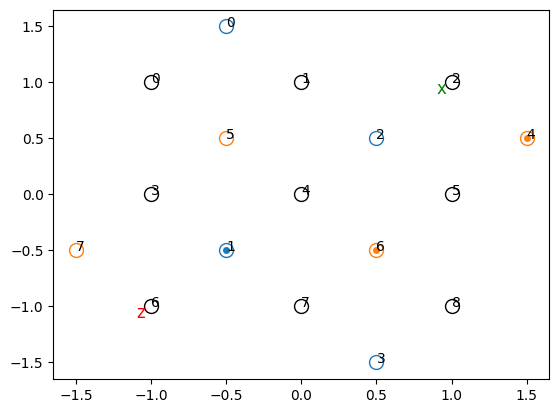

In [50]:
d = 3
q_list, sx_list, sz_list = idx_to_coord(d)
plotter(q_list,color="k")
plotter(sx_list,color="C0")
plotter(sz_list,color="C1")

syndrome = np.array([4,6,1])
# recovery = decoder(syndrome,"z")
recovery_x, recovery_z = decoder(d, syndrome)
print(recovery_x, recovery_z)
for qubit in recovery_x:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"z",fontsize=12, color="red")

for qubit in recovery_z:
    x,y = q_list[f"{qubit}"]
    plt.text(x-0.1,y-0.1,"x",fontsize=12, color="green")

syndrome_x = syndrome[np.argwhere(syndrome< (d**2-1)//2)[:,0]]
syndrome_z = syndrome[np.argwhere(syndrome>= (d**2-1)//2)[:,0]]
# print(syndrome_x,syndrome_z)
for s in syndrome_x:
    x,y = sx_list[f"{s}"]
    plt.plot(x,y,"o",markerfacecolor="C0",markeredgecolor="None",markersize=5)

for s in syndrome_z:
    x,y = sz_list[f"{s}"]
    plt.plot(x,y,"o",markerfacecolor="C1",markeredgecolor="None",markersize=5)